### Delivery_time

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
data = pd.read_csv("delivery_time.csv")

In [71]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## EDA

In [72]:
data.shape

(21, 2)

In [73]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [75]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


## Data  Visualization

{'whiskers': [<matplotlib.lines.Line2D at 0x24d7e07cee0>,
 'caps': [<matplotlib.lines.Line2D at 0x24d7e09a4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d7e07cbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x24d7e09aa60>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d7e09ad30>],
 'means': []}

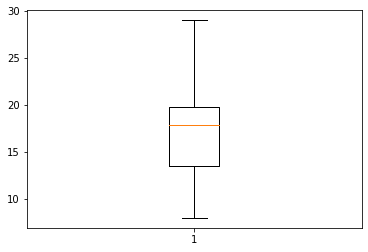

In [76]:
plt.boxplot(data['Delivery Time'])

No outliers in Delivery time column 

Column is normally distributed

The average of column is 18

{'whiskers': [<matplotlib.lines.Line2D at 0x24d7e09b490>,
 'caps': [<matplotlib.lines.Line2D at 0x24d7ce65940>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d7e09b970>],
 'medians': [<matplotlib.lines.Line2D at 0x24d7ce655b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d7ce59490>],
 'means': []}

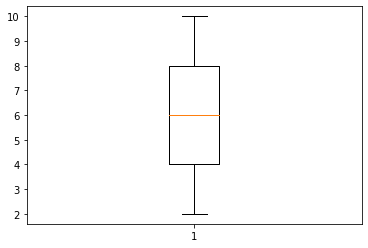

In [77]:
plt.boxplot(data['Sorting Time'])

No outliers in Sorting time column 

Column is normally distributed

The average of column is 6

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

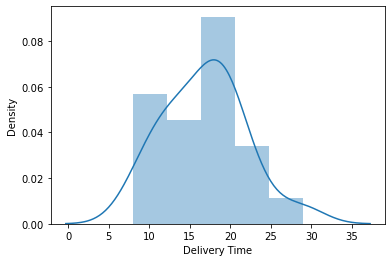

In [78]:
sns.distplot(data['Delivery Time'])

In [80]:
data['Delivery Time'].skew()

0.3523900822831107

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

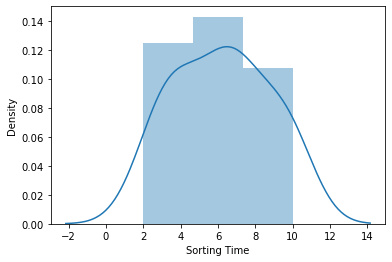

In [12]:
sns.distplot(data['Sorting Time'])

In [82]:
data['Sorting Time'].skew()

0.047115474210530174

## Correlation

In [83]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


### Renaming Columnname

In [15]:
data1=data.rename({'Delivery Time':'deliverytime', 'Sorting Time':'sortingtime'},axis=1)
data1

,deliverytime,sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Testing

In [16]:
import statsmodels.formula.api as smf
model = smf.ols("deliverytime~sortingtime",data = data1).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        16:38:34   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
sortingtime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

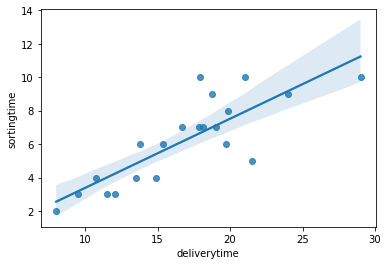

In [18]:
sns.regplot(x="deliverytime", y="sortingtime", data=data1);

In [19]:
#Coefficients
model.params

Intercept      6.582734
sortingtime    1.649020
dtype: float64

In [20]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept      3.823349
sortingtime    6.387447
dtype: float64 
 Intercept      0.001147
sortingtime    0.000004
dtype: float64


In [21]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

## Data Transformation

### SQRT

In [22]:
data1['deliverytime']=np.sqrt(data1['deliverytime'])

In [23]:
data1['sortingtime']=np.sqrt(data1['sortingtime'])

In [24]:
data1.skew()

deliverytime   -0.061811
sortingtime    -0.259816
dtype: float64

In [25]:
import statsmodels.formula.api as smf
model1 = smf.ols("deliverytime~sortingtime",data = data1).fit() 

In [26]:
(model1.rsquared,model1.rsquared_adj)

(0.7292011987544664, 0.7149486302678594)

### Log

In [44]:
data2 = pd.read_csv("delivery_time.csv")
data2=data2.rename({'Delivery Time':'deliverytime', 'Sorting Time':'sortingtime'},axis=1)

In [45]:
data2['deliverytime']=np.log(data2['deliverytime'])

In [46]:
data2['sortingtime']=np.log(data2['sortingtime'])

In [47]:
data2.skew()

deliverytime   -0.451290
sortingtime    -0.605236
dtype: float64

In [48]:
import statsmodels.formula.api as smf
model2 = smf.ols("deliverytime~sortingtime",data = data2).fit() 

In [49]:
(model2.rsquared,model2.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

### Exponetial

In [50]:
data3 = pd.read_csv("delivery_time.csv")
data3=data3.rename({'Delivery Time':'deliverytime', 'Sorting Time':'sortingtime'},axis=1)

In [51]:
data3['deliverytime']=np.exp(data3['deliverytime'])

In [52]:
data3['sortingtime']=np.exp(data3['sortingtime'])

In [53]:
data3.skew()

deliverytime    4.582236
sortingtime     1.859909
dtype: float64

In [36]:
import statsmodels.formula.api as smf
model3= smf.ols("deliverytime~sortingtime",data = data3).fit() 

In [37]:
(model3.rsquared,model3.rsquared_adj)

(0.27360134105224776, 0.23536983268657663)

### Reciprocal

In [38]:
data4 = pd.read_csv("delivery_time.csv")
data4=data4.rename({'Delivery Time':'deliverytime', 'Sorting Time':'sortingtime'},axis=1)

In [39]:
data4['sortingtime']=np.reciprocal(data4['sortingtime'])

In [40]:
data4['deliverytime']=np.reciprocal(data4['deliverytime'])

In [41]:
import statsmodels.formula.api as smf
model4= smf.ols("deliverytime~sortingtime",data = data1).fit() 

In [42]:
(model4.rsquared,model4.rsquared_adj)

(0.7292011987544664, 0.7149486302678594)

- Out of 4 transformation log transformation gives best accuracy ,so we use log transforamtion for final model

## Predict New Data Point

In [62]:
newdata=pd.Series([4,7])

In [63]:
data_pred=pd.DataFrame(newdata,columns=['sortingtime'])

In [64]:
data_pred

,sortingtime
0,4
1,7


In [65]:
model2.predict(data_pred)

0    4.132076
1    5.924643
dtype: float64